Numberical simulation

In [75]:
import base, constant
import numpy as np, qiskit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import importlib
importlib.reload(constant)
importlib.reload(base)

<module 'base' from 'c:\\Users\\haime\\OneDrive\\Documents\\GitHub\\Lagrange interpolation approach for GPRX\\base.py'>

In [70]:
step_sizes = base.create_log_step_sizes(0.01, 3, 0.01)
thetas = np.asarray([np.pi/2, np.pi/3, np.pi/6])
def u(qc, thetas):
    qc.rx(thetas[0], 0)
    qc.rz(thetas[1], 1)
    qc.cry(thetas[2], 0, 1)
    return qc
def f(thetas):
    qc = qiskit.QuantumCircuit(2,2)
    qc = u(qc, thetas)
    return base.measure(qc, [0, 1])

true_grad = base.true_grad(thetas)

mean_MSE_stds = []
mean_MSE_finites = []
std_MSE_stds = []
std_MSE_finites = []
for step_size in step_sizes:
    print(step_size)
    grad_finites = []
    grad_stds = []

    for _ in range(0, 5):
        grad_finite = []
        grad_std = []
        for j in range(0, thetas.shape[0]):
            length = thetas.shape[0]
            f_left = f(thetas + step_size * base.unit_vector(j, length))
            f_right = f(thetas + step_size * base.unit_vector(j, length))
            if j != 2:
                grad_std.append(base.a_pseudo_two_prx(f_left, f_right, step_size))
                # grad_finite.append(base.two_finite_diff(f, thetas_origin, j, step_size))
            else:
                grad_std.append(base.pseudo_four_prx(f, thetas, j))
            grad_finite.append(base.a_two_finite_diff(f_left, f_right, step_size))
        grad_stds.append(mean_squared_error(grad_std, true_grad))
        grad_finites.append(mean_squared_error(grad_finite, true_grad))
    mean_MSE_stds.append(np.mean(grad_stds,axis = 0))
    std_MSE_stds.append(np.std(grad_stds,axis = 0))

    mean_MSE_finites.append(np.mean(grad_finites,axis = 0))
    std_MSE_finites.append(np.std(grad_finites,axis = 0))

np.savetxt('mean_MSE_stds.txt', mean_MSE_stds)
np.savetxt('std_MSE_stds.txt', std_MSE_stds)
np.savetxt('mean_MSE_finites.txt', mean_MSE_finites)
np.savetxt('std_MSE_finites.txt', std_MSE_finites)

0.01
0.11
0.21100000000000002
0.31301
0.4160401
0.520100501
0.62520150601
0.7313535210701
0.838567056280801
0.946852726843609
1.056221254112045
1.1666834666531656
1.2782503013196973
1.3909328043328943
1.5047421323762233
1.6196895536999856
1.7357864492369854
1.8530443137293553
1.9714747568666489
2.0910895044353155
2.211900399479669
2.3339194034744657
2.4571585975092103
2.5816301834843025
2.7073464853191456
2.834319950172337
2.9625631496740605


In [32]:
step_sizes = np.arange(10**(-2), 1, 10**(-1))
mean_grad_stds = np.asarray(np.loadtxt('mean_grad_stds.txt'))
mean_grad_finites = np.asarray(np.loadtxt('mean_grad_finites.txt'))
e_std = []
for i in range(0, mean_grad_stds.shape[0]):
    e_std.append(mean_squared_error(mean_grad_stds[i], mean_grad_finites[i]))

### Mean 

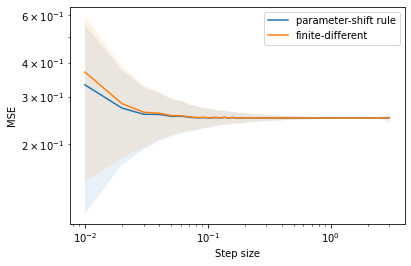

In [77]:
mean_MSE_stds = np.asarray(np.loadtxt('mean_MSE_stds.txt'))
std_MSE_stds = np.asarray(np.loadtxt('std_MSE_stds.txt'))
mean_MSE_finites = np.asarray(np.loadtxt('mean_MSE_finites.txt'))
std_MSE_finites = np.asarray(np.loadtxt('std_MSE_finites.txt'))

step_sizes = base.create_log_step_sizes(0.01, 3, 0.01)
mean_MSE_stds = np.asarray(mean_MSE_stds)
std_MSE_stds = np.asarray(std_MSE_stds)
mean_MSE_finites = np.asarray(mean_MSE_finites)
std_MSE_finites = np.asarray(std_MSE_finites)
plt.plot(step_sizes, mean_MSE_stds, label = "parameter-shift rule")
plt.fill_between(step_sizes, mean_MSE_stds - std_MSE_stds, mean_MSE_stds + std_MSE_stds, alpha=0.1)
plt.plot(step_sizes, mean_MSE_finites,  label = "finite-different")
plt.fill_between(step_sizes, mean_MSE_finites - std_MSE_finites, mean_MSE_finites + std_MSE_finites, alpha=0.1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Step size")
plt.ylabel("MSE")
plt.legend()

### X

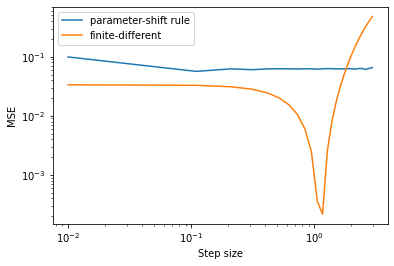

In [56]:
plt.plot(step_sizes, mean_MSE_stds, label = "parameter-shift rule")
plt.fill_between(step_sizes, mean_MSE_stds - std_MSE_stds, mean_MSE_stds + std_MSE_stds, alpha=0.1)
plt.plot(step_sizes, mean_MSE_finites,  label = "finite-different")
plt.fill_between(step_sizes, mean_MSE_finites - std_MSE_finites, mean_MSE_finites + std_MSE_finites, alpha=0.1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Step size")
plt.ylabel("MSE")
plt.legend()

### Y

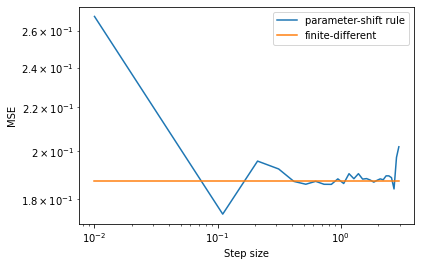

In [57]:
e_std_y, e_finite_y = [], []
for i in range(0, step_sizes.shape[0]):
    e_std_y.append(mean_squared_error([mean_grad_stds[i][1]], [true_grad[1]]))
    e_finite_y.append(mean_squared_error([mean_grad_finites[i][1]], [true_grad[1]]))
plt.plot(step_sizes, e_std_y, label = "parameter-shift rule")
plt.plot(step_sizes, e_finite_y,  label = "finite-different")
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Step size")
plt.ylabel("MSE")
plt.legend()